In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/house_price_adv_regr.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape


(1460, 81)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], inplace = True)


In [ ]:
df.dropna(inplace = True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [ ]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']


In [ ]:
X['GarageYrBlt'] = X['GarageYrBlt'].astype('int64')


In [ ]:
years = [col for col in X.columns if col.startswith('Y') == True]
years.append('GarageYrBlt')

objects = [col for col in X.columns if X[col].dtypes == 'object']
integers = [col for col in X.columns if X[col].dtypes == 'int64' and col not in years]
floats = [col for col in X.columns if X[col].dtypes == 'float64']


In [ ]:
X[floats].head()


,LotFrontage,MasVnrArea
0,65.0,196.0
1,80.0,0.0
2,68.0,162.0
3,60.0,0.0
4,84.0,350.0


In [ ]:
X[integers].head()


,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,8450,7,5,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,2
1,20,9600,6,8,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,5
2,60,11250,7,5,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,9
3,70,9550,7,5,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,2
4,60,14260,8,5,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,12


In [ ]:
X[years].head()


,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
0,2003,2003,2008,2003
1,1976,1976,2007,1976
2,2001,2002,2008,2001
3,1915,1970,2006,1998
4,2000,2000,2008,2000


In [ ]:
X[integers].columns


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold'],
      dtype='object')

In [ ]:
X[objects].head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
for col in objects:
    print (col, X[col].nunique())


MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 6
BldgType 5
HouseStyle 8
RoofStyle 5
RoofMatl 7
Exterior1st 14
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 4
Foundation 5
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 4
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 6
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

oe = ce.OrdinalEncoder(cols = objects)


In [ ]:
X = oe.fit_transform(X)


In [ ]:
X.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,1,65.0,8450,1,1,1,1,1,1,...,61,0,0,0,0,0,2,2008,1,1
1,20,1,80.0,9600,1,1,1,1,2,1,...,0,0,0,0,0,0,5,2007,1,1
2,60,1,68.0,11250,1,2,1,1,1,1,...,42,0,0,0,0,0,9,2008,1,1
3,70,1,60.0,9550,1,2,1,1,3,1,...,35,272,0,0,0,0,2,2006,1,2
4,60,1,84.0,14260,1,2,1,1,2,1,...,84,0,0,0,0,0,12,2008,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [ ]:
# baseline model - RandomForestRegressor


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

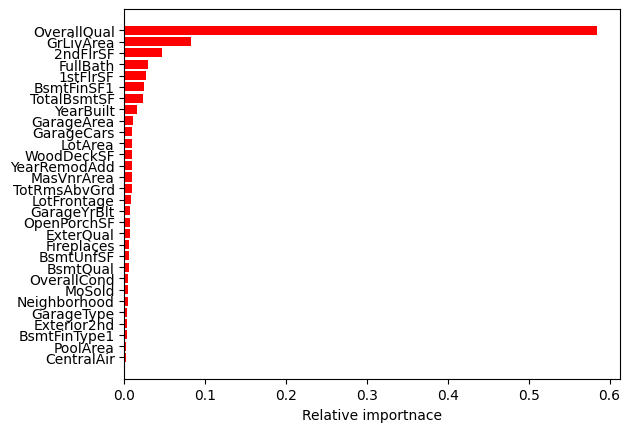

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[-30:]
features = X.columns

plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative importnace')
plt.show()


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('MSE: ', mse)
    print('MAE: ', mae)
    print('RMSE: ', rmse)
    print('R2: ', r2)

metrics(y_test, y_pred_gbr)


MSE:  639995744.9822402
MAE:  17051.537783440795
RMSE:  25298.13718403472
R2:  0.918096918086977


In [ ]:
# Hyperparameter Tuning

# params = {
#     'learning_rate':[0.001, 0.01, 0.1],
#     'n_estimators':[500, 1000, 2000],
#     'max_depth':[5, 10, 15]
# }


In [ ]:
# gbr = GradientBoostingRegressor()

# gbr_tuned = GridSearchCV(gbr, params, cv = 5, scoring = 'neg_mean_squared_error')
# gbr_tuned.fit(X_train, y_train)
